**Thinkful - Challenge 2.1.8 - Preparing a Dataset for Modeling**

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

**Outcome Variable:**
Adoptibility of dogs

**Other variables**

1. Categorical - breed
2. Categorical - sex and spay/neuter status
3. Categorical - outcome (transfer, euthanasia, adoption, partner)
4. Continuous - date of birth
5. Continuous - date of outcome

**Ten new features**
1. Sex (pie chart)
2. Spay/neuter status (pie chart)
3. Age upon outcome (histogram)
4. Bully breed (pie chart)
5. Avg age vs outcome for bully and non-bully breeds (boxplots)
6. Total counts vs outcome for bully and non-bully breeds (bar plot)
7. Total counts vs month of year for bully and non-bully breeds (bar plot)
8. Total counts vs season for top 4 outcomes (bar plot)
9. Age of outcome vs time of year (scatter plot)
10. Total counts vs age for all outcomes for bully breeds (bar plot)

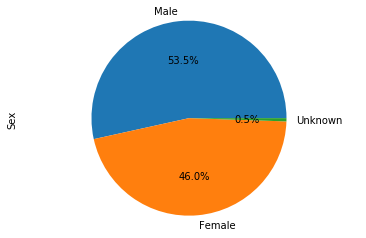

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')

sex_upon_outcome = df['sex_upon_outcome']         
sex = []
for i in range(len(sex_upon_outcome)):
    try:
        if re.search('Male' , sex_upon_outcome[i]):
            sex.append('Male')
        elif re.search('Female' , sex_upon_outcome[i]):
            sex.append('Female')
        else:
            sex.append('Unknown')
    except TypeError:
        sex.append('TypeError')

#Append subject list to dataframe and output counts and avg cost by subject
df['Sex'] = pd.Series(sex, index=df.index)
df['Sex'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

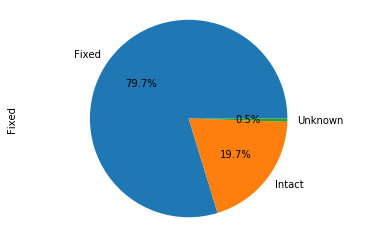

In [2]:
fixed = []
for i in range(len(sex_upon_outcome)):
    try:
        if (re.search('Intact' , sex_upon_outcome[i])):
            fixed.append('Intact')
        elif ((re.search('Spayed' , sex_upon_outcome[i]))or
              (re.search('Neutered' , sex_upon_outcome[i]))):
            fixed.append('Fixed')
        else:
            fixed.append('Unknown')   
    except TypeError:
        fixed.append('TypeError')

df['Fixed'] = pd.Series(fixed, index=df.index)
df['Fixed'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

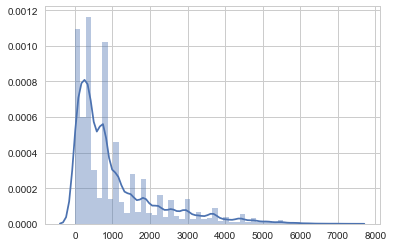

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')

DOB = df['date_of_birth']
date_of_outcome = df['datetime']
age_at_outcome = []
for i in range(len(DOB)):
    DOB[i] = datetime.datetime.strptime(DOB[i], "%Y-%m-%dT%H:%M:%S")
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    age_at_outcome.append(abs((date_of_outcome[i] - DOB[i]).days))

df['Age at Outcome'] = pd.Series(age_at_outcome, index=df.index)
sns.distplot(age_at_outcome)
plt.show()

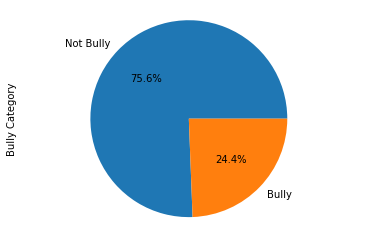

In [8]:
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')
        
df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)
df['Bully Category'].value_counts().plot(kind='pie',autopct='%1.01f%%')
plt.axis('equal')
plt.show()

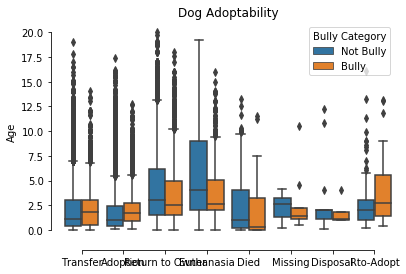

In [9]:
# Comparing groups using boxplots.
ax = sns.boxplot(x=outcome_type,y='Age at Outcome',hue='Bully Category',data=df)  
plt.title('Dog Adoptability')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Age')
plt.show()

      outcome_type  Bully  Not Bully
0         Adoption   4175      15877
1             Died     26        112
2         Disposal      4         13
3       Euthanasia    680        824
4          Missing     11          6
5  Return to Owner   3749       9125
6        Rto-Adopt     49         68
7         Transfer   2095       7423


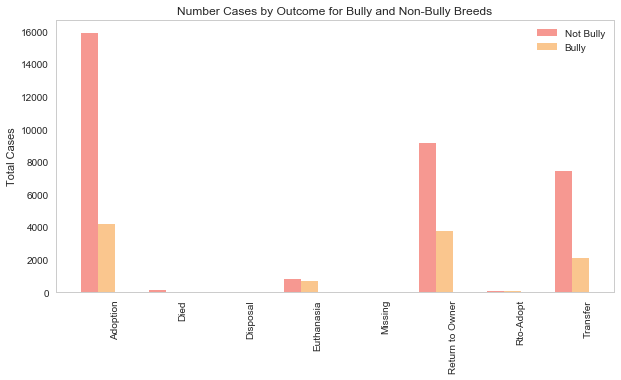

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')

df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)

#Grouping by two columns, second set of brackets is what is actually being counted/aggregated
df2 = df.groupby(['outcome_type','Bully Category'])['sex_upon_outcome'].count()
df3 = df2.unstack(level=-1)
df3.columns = [''.join(col).strip() for col in df3.columns.values]
df3 = df3.reset_index()
print(df3)

# Setting the positions and width for the bars
pos = list(range(len(df3['outcome_type'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df3['Not Bully'],width,alpha=0.5,color='#EE3224',label=df3['outcome_type'][0])
plt.bar([p + width for p in pos],df3['Bully'],width,alpha=0.5,color='#F78F1E',label=df3['outcome_type'][1])
 
# Plot attributes
ax.set_ylabel('Total Cases')
ax.set_title('Number Cases by Outcome for Bully and Non-Bully Breeds')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df3['outcome_type'],rotation=90)
plt.legend(['Not Bully', 'Bully'], loc='upper right')
plt.grid()
plt.show()

        Month  Bully  Not Bully
0       April    800       2450
1      August    822       2515
2    December   1081       3156
3    February    834       2474
4     January   1059       3115
5        July    813       2697
6        June    802       2573
7       March    790       2596
8         May    894       3000
9    November   1008       3106
10    October   1040       3264
11  September    848       2503


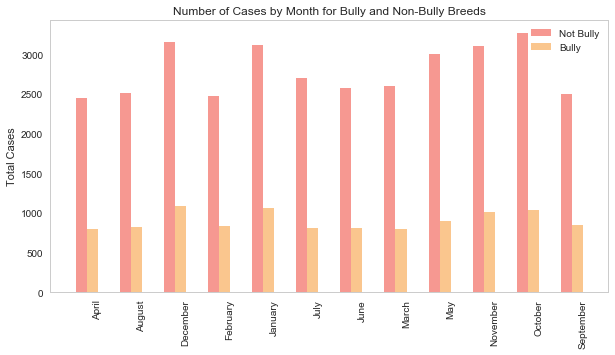

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')
''''''
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')

df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)

date_of_outcome = df['datetime']
month = []
for i in range(len(date_of_outcome)):
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    month.append(date_of_outcome[i].strftime("%B"))

df['Month'] = pd.Series(month, index=df.index)
    
#Grouping by two columns, second set of brackets is what is actually being counted/aggregated
df2 = df.groupby(['Month','Bully Category'])['sex_upon_outcome'].count()
df3 = df2.unstack(level=-1)
df3.columns = [''.join(col).strip() for col in df3.columns.values]
df3 = df3.reset_index()
print(df3)

# Setting the positions and width for the bars
pos = list(range(len(df3['Month'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df3['Not Bully'],width,alpha=0.5,color='#EE3224',label=df3['Month'][0])
plt.bar([p + width for p in pos],df3['Bully'],width,alpha=0.5,color='#F78F1E',label=df3['Month'][1])
 
# Plot attributes
ax.set_ylabel('Total Cases')
ax.set_title('Number of Cases by Month for Bully and Non-Bully Breeds')
ax.set_xticks([p + 1.5 * width for p in pos])
#month_order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"]
#ax.set_xticklabels(month_order,rotation=90)
ax.set_xticklabels(df3['Month'],rotation=90)
plt.legend(['Not Bully', 'Bully'], loc='upper right')
plt.grid()
plt.show()

   Season  Adoption  Died  Disposal  Euthanasia  Missing  Return to Owner  \
0  Autumn    5538.0  31.0       1.0       470.0      3.0           3716.0   
1  Spring    4589.0  42.0       NaN       367.0      6.0           3157.0   
2  Summer    4916.0  34.0       2.0       310.0      3.0           2736.0   
3  Winter    5009.0  31.0      14.0       357.0      5.0           3265.0   

   Rto-Adopt  Transfer  
0       23.0    2871.0  
1       45.0    2313.0  
2       33.0    2164.0  
3       16.0    2170.0  


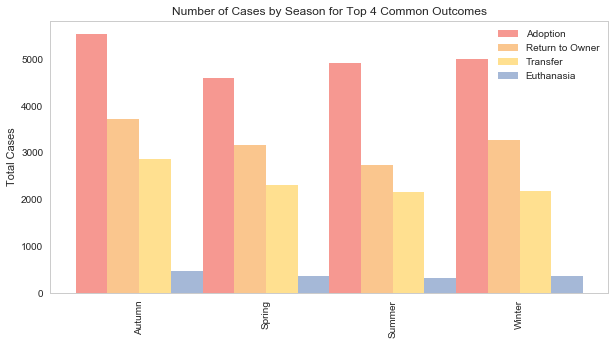

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')
''''''
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')

df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)

date_of_outcome = df['datetime']
month = []
season = []
for i in range(len(date_of_outcome)):
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    month.append(int(date_of_outcome[i].strftime("%m")))
    if month[i] < 4:
        season.append('Winter')
    elif month[i] < 7:
        season.append('Spring')
    elif month[i] < 10:
        season.append('Summer')
    else:
        season.append('Autumn')
    
df['Season'] = pd.Series(season, index=df.index)
    
#Grouping by two columns, second set of brackets is what is actually being counted/aggregated
df2 = df.groupby(['Season','outcome_type'])['sex_upon_outcome'].count()
df3 = df2.unstack(level=-1)
df3.columns = [''.join(col).strip() for col in df3.columns.values]
df3 = df3.reset_index()
print(df3)

# Setting the positions and width for the bars
pos = list(range(len(df3['Season'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df3['Adoption'],width,alpha=0.5,color='#EE3224',label=df3['Season'][0])
plt.bar([p + width for p in pos],df3['Return to Owner'],width,alpha=0.5,color='#F78F1E',label=df3['Season'][1])
plt.bar([p + width*2 for p in pos],df3['Transfer'],width,alpha=0.5,color='#FFC222',label=df3['Season'][1])
plt.bar([p + width*3 for p in pos],df3['Euthanasia'],width,alpha=0.5,label=df3['Season'][1])
 
# Plot attributes
ax.set_ylabel('Total Cases')
ax.set_title('Number of Cases by Season for Top 4 Common Outcomes')
ax.set_xticks([p + 1.5 * width for p in pos])
#seasons_order = ["Winter", "Spring", "Summer", "Autumn"]
#ax.set_xticklabels(seasons_order,rotation=90)
ax.set_xticklabels(df3['Season'],rotation=90)
plt.legend(['Adoption', 'Return to Owner','Transfer','Euthanasia'], loc='upper right')
plt.grid()
plt.show()

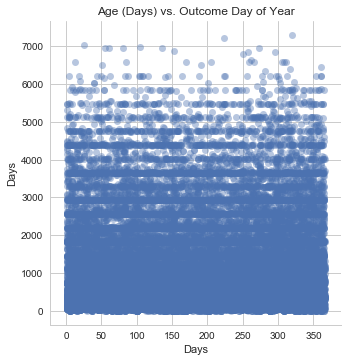

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')

DOB = df['date_of_birth']
date_of_outcome = df['datetime']
age_at_outcome = []
day_of_year =[]
for i in range(len(DOB)):
    DOB[i] = datetime.datetime.strptime(DOB[i], "%Y-%m-%dT%H:%M:%S")
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    age_at_outcome.append(abs((date_of_outcome[i] - DOB[i]).days))
    day_of_year.append(date_of_outcome[i].timetuple().tm_yday)
    
df['Age at Outcome'] = pd.Series(age_at_outcome, index=df.index)
df['Outcome Day of Year'] = pd.Series(day_of_year, index=df.index)
g = sns.lmplot(y='Age at Outcome', x='Outcome Day of Year',data=df, fit_reg=False,scatter_kws={'alpha':0.4})
g.set_ylabels("Days")
g.set_xlabels("Days")
plt.title('Age (Days) vs. Outcome Day of Year')
plt.show()

    Life Phase  Bully  Not Bully
0   Adolescent   2006       7621
1       Mature   1560       4363
2        Puppy   1383       6764
3       Senior    919       4375
4  Young Adult   4923      10326


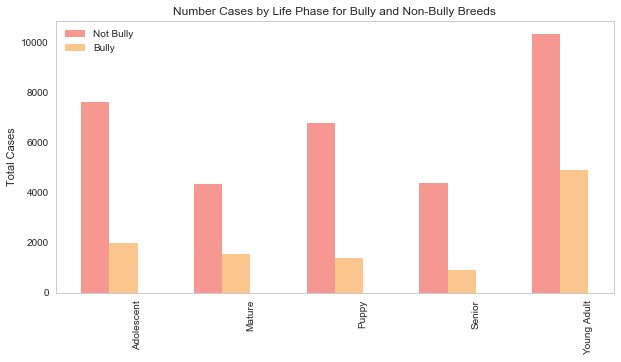

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import datetime
from datetime import date

df = pd.read_csv('aac_shelter_outcomes2.csv', encoding='latin1')
''''''
breed = df['breed']
outcome_type = df['outcome_type']
dogbreed_bully = []
for i in range(len(breed)):
    if ((re.search('Staff' , breed[i]))or
        (re.search('Boston' , breed[i]))or
        (re.search('Mastiff' , breed[i]))or
        (re.search('Rott' , breed[i]))or
        (re.search('Boxer' , breed[i]))or
        (re.search('Bull' , breed[i]))):
        dogbreed_bully.append('Bully')
    else:
        dogbreed_bully.append('Not Bully')

df['Bully Category'] = pd.Series(dogbreed_bully, index=df.index)

DOB = df['date_of_birth']
date_of_outcome = df['datetime']
age_at_outcome = []
life_phase = []
for i in range(len(DOB)):
    DOB[i] = datetime.datetime.strptime(DOB[i], "%Y-%m-%dT%H:%M:%S")
    date_of_outcome[i] = datetime.datetime.strptime(date_of_outcome[i], "%Y-%m-%dT%H:%M:%S")
    age_at_outcome.append(abs((date_of_outcome[i] - DOB[i]).days))
    if age_at_outcome[i] < 180:
        life_phase.append('Puppy')
    elif age_at_outcome[i] < 400:
        life_phase.append('Adolescent')
    elif age_at_outcome[i] < 1460:
        life_phase.append('Young Adult')
    elif age_at_outcome[i] < 2555:
        life_phase.append('Mature')
    else:
        life_phase.append('Senior')
    
df['Life Phase'] = pd.Series(life_phase, index=df.index)
    
#Grouping by two columns, second set of brackets is what is actually being counted/aggregated
df2 = df.groupby(['Life Phase','Bully Category'])['sex_upon_outcome'].count()
df3 = df2.unstack(level=-1)
df3.columns = [''.join(col).strip() for col in df3.columns.values]
df3 = df3.reset_index()
print(df3)

# Setting the positions and width for the bars
pos = list(range(len(df3['Life Phase'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with score data
plt.bar(pos,df3['Not Bully'],width,alpha=0.5,color='#EE3224',label=df3['Life Phase'][0])
plt.bar([p + width for p in pos],df3['Bully'],width,alpha=0.5,color='#F78F1E',label=df3['Life Phase'][1])
 
# Plot attributes
ax.set_ylabel('Total Cases')
ax.set_title('Number Cases by Life Phase for Bully and Non-Bully Breeds')
ax.set_xticks([p + 1.5 * width for p in pos])
#life_phase_order = ["Puppy", "Adolescent", "Young Adult", "Mature","Senior"]
#ax.set_xticklabels(life_phase_order,rotation=90)
ax.set_xticklabels(df3['Life Phase'],rotation=90)
plt.legend(['Not Bully', 'Bully'], loc='upper left')
plt.grid()
plt.show()